<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,44.262947,57.128655,-59.954713,106.957124,139.090112,-32.132988
1,0.0,1.0,49.633248,51.933437,48.405848,126.769910,286.742444,211.468453,75.273991
2,0.0,2.0,79.051543,82.535765,63.683617,230.040645,465.311570,31.300131,434.011439
3,0.0,3.0,32.810280,47.048985,82.973968,-250.746987,-77.913753,-51.421189,-26.492565
4,0.0,4.0,85.777397,65.408576,90.889770,-265.405185,-13.329442,-187.061500,173.732057
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,143.600565,328.644059,323.177902,5.466157
19996,999.0,16.0,92.663682,58.512599,35.091714,45.101099,241.369094,257.540613,-16.171519
19997,999.0,17.0,63.062248,86.565478,27.853802,856.589593,1044.071121,326.412806,717.658315
19998,999.0,18.0,47.655607,57.944117,86.192826,13.517680,215.310230,241.245359,-25.935129


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3           e            Y  \
rep   index                                                             
0.0   0.0    55.520235  44.262947  57.128655  -59.954713   106.957124   
      1.0    49.633248  51.933437  48.405848  126.769910   286.742444   
      2.0    79.051543  82.535765  63.683617  230.040645   465.311570   
      3.0    32.810280  47.048985  82.973968 -250.746987   -77.913753   
      4.0    85.777397  65.408576  90.889770 -265.405185   -13.329442   
...                ...        ...        ...         ...          ...   
999.0 15.0   23.294746  92.518305  59.230443  143.600565   328.644059   
      16.0   92.663682  58.512599  35.091714   45.101099   241.369094   
      17.0   63.062248  86.565478  27.853802  856.589593  1044.071121   
      18.0   47.655607  57.944117  86.192826   13.517680   215.310230   
      19.0   99.921349  36.147862  51.264949  279.293590   476.627750   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    139.090112  -32.132988  
      1.0    211.468453   75.273991  
      2.0     31.300131  434.011439  
      3.0    -51.421189  -26.492565  
      4.0   -187.061500  173.732057  
...                 ...         ...  
999.0 15.0   323.177902    5.466157  
      16.0   257.540613  -16.171519  
      17.0   326.412806  717.658315  
      18.0   241.245359  -25.935129  
      19.0   185.231044  291.396705  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3           e            Y  \
rep   index                                                             
0.0   0.0    55.520235  44.262947  57.128655  -59.954713   106.957124   
      1.0    49.633248  51.933437  48.405848  126.769910   286.742444   
      2.0    79.051543  82.535765  63.683617  230.040645   465.311570   
      3.0    32.810280  47.048985  82.973968 -250.746987   -77.913753   
      4.0    85.777397  65.408576  90.889770 -265.405185   -13.329442   
...                ...        ...        ...         ...          ...   
999.0 15.0   23.294746  92.518305  59.230443  143.600565   328.644059   
      16.0   92.663682  58.512599  35.091714   45.101099   241.369094   
      17.0   63.062248  86.565478  27.853802  856.589593  1044.071121   
      18.0   47.655607  57.944117  86.192826   13.517680   215.310230   
      19.0   99.921349  36.147862  51.264949  279.293590   476.627750   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    139.090112  -32.132988  
      1.0    211.468453   75.273991  
      2.0     31.300131  434.011439  
      3.0    -51.421189  -26.492565  
      4.0   -187.061500  173.732057  
...                 ...         ...  
999.0 15.0   323.177902    5.466157  
      16.0   257.540613  -16.171519  
      17.0   326.412806  717.658315  
      18.0   241.245359  -25.935129  
      19.0   185.231044  291.396705  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,44.262947,57.128655,-59.954713,106.957124,139.090112,-32.132988
1,0.0,1.0,49.633248,51.933437,48.405848,126.769910,286.742444,211.468453,75.273991
2,0.0,2.0,79.051543,82.535765,63.683617,230.040645,465.311570,31.300131,434.011439
3,0.0,3.0,32.810280,47.048985,82.973968,-250.746987,-77.913753,-51.421189,-26.492565
4,0.0,4.0,85.777397,65.408576,90.889770,-265.405185,-13.329442,-187.061500,173.732057
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.294746,92.518305,59.230443,143.600565,328.644059,323.177902,5.466157
19996,999.0,16.0,92.663682,58.512599,35.091714,45.101099,241.369094,257.540613,-16.171519
19997,999.0,17.0,63.062248,86.565478,27.853802,856.589593,1044.071121,326.412806,717.658315
19998,999.0,18.0,47.655607,57.944117,86.192826,13.517680,215.310230,241.245359,-25.935129


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3           e            Y  \
rep   index                                                             
0.0   0.0    55.520235  44.262947  57.128655  -59.954713   106.957124   
      1.0    49.633248  51.933437  48.405848  126.769910   286.742444   
      2.0    79.051543  82.535765  63.683617  230.040645   465.311570   
      3.0    32.810280  47.048985  82.973968 -250.746987   -77.913753   
      4.0    85.777397  65.408576  90.889770 -265.405185   -13.329442   
...                ...        ...        ...         ...          ...   
999.0 15.0   23.294746  92.518305  59.230443  143.600565   328.644059   
      16.0   92.663682  58.512599  35.091714   45.101099   241.369094   
      17.0   63.062248  86.565478  27.853802  856.589593  1044.071121   
      18.0   47.655607  57.944117  86.192826   13.517680   215.310230   
      19.0   99.921349  36.147862  51.264949  279.293590   476.627750   

                  y_hat       e_hat  
rep   index                          
0.0   0.0    139.090112  -32.132988  
      1.0    211.468453   75.273991  
      2.0     31.300131  434.011439  
      3.0    -51.421189  -26.492565  
      4.0   -187.061500  173.732057  
...                 ...         ...  
999.0 15.0   323.177902    5.466157  
      16.0   257.540613  -16.171519  
      17.0   326.412806  717.658315  
      18.0   241.245359  -25.935129  
      19.0   185.231044  291.396705  

[20000 rows x 7 columns]

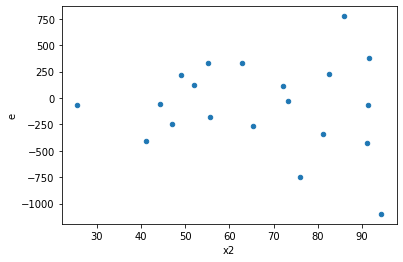

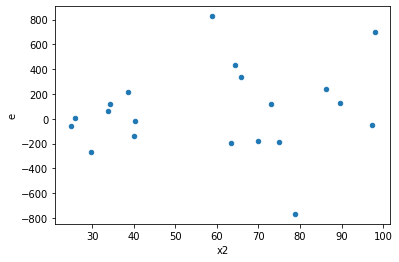

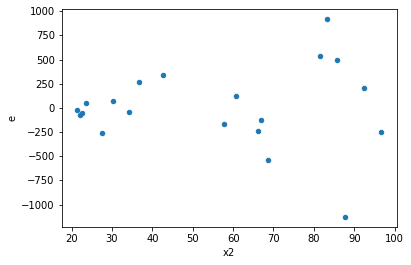

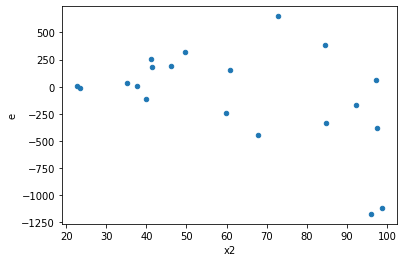

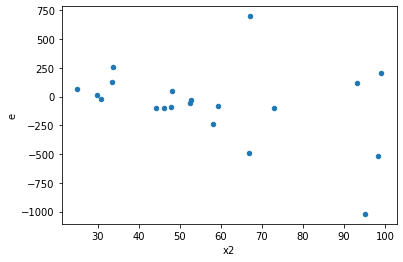

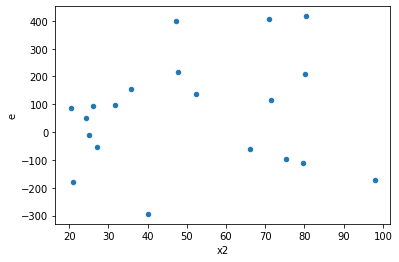

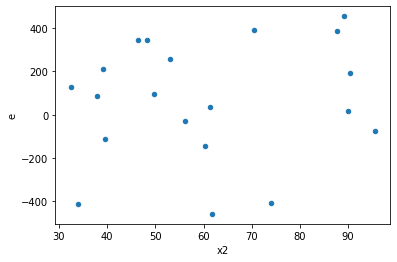

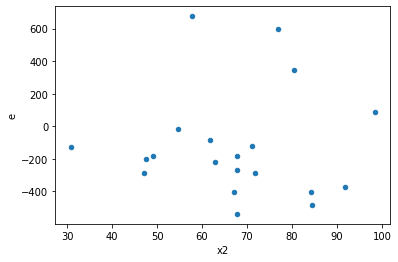

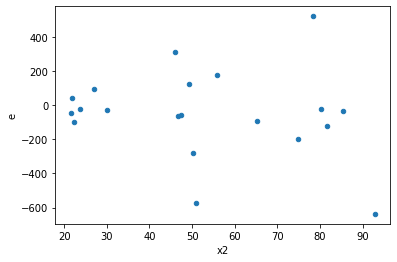

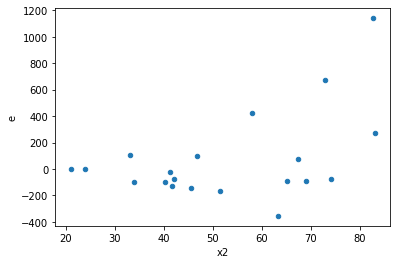

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,6.0,773526.6294238328,1121370.718990981,96690.8286779791,186895.11983183018,1.9329146557867356,0.43757582824477437,0.7812120858776128,0.21878791412238718,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,201218.19756759575,647262.9512964728,40243.63951351915,71918.10569960809,1.7870676352581991,0.4232126858159635,0.7883936570920183,0.21160634290798175,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,75315.92459336063,1533297.5896866892,12552.654098893438,191662.19871083615,15.268659297138752,0.0010930522951879684,0.999453473852406,0.0005465261475939842,Reject001=0 : Heteroscedasticity
5.0,5.0,9.0,91940.90244818066,339432.9683042428,18388.180489636132,37714.77425602698,2.051033503683718,0.3293244953557841,0.8353377523221079,0.16466224767789206,Reject001=1 : Homoscedasticity
6.0,11.0,3.0,590331.9052676015,200402.26881998032,53666.536842509224,66800.75627332677,1.24473760006839,0.9646215526617588,0.5176892236691206,0.4823107763308794,Reject001=1 : Homoscedasticity
7.0,2.0,12.0,4160.217129771857,437920.16436023486,2080.1085648859284,36493.34703001957,17.54396267870799,0.0005478480674594444,0.9997260759662703,0.0002739240337297222,Reject001=0 : Heteroscedasticity
8.0,7.0,7.0,248824.7962463529,566107.1629600951,35546.3994637647,80872.45185144215,2.2751235869579967,0.30033183181241974,0.8498340840937901,0.15016591590620987,Reject001=1 : Homoscedasticity
11.0,12.0,2.0,482363.4820895662,184185.8858829557,40196.95684079718,92092.94294147786,2.291042660423731,0.6876612695933575,0.6561693652033213,0.34383063479667875,Reject001=1 : Homoscedasticity
12.0,5.0,9.0,209150.42027214385,501770.3967862248,41830.08405442877,55752.26630958053,1.33282702078811,0.6659318036197779,0.6670340981901111,0.33296590180988894,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,6.0,773526.6294238328,1121370.718990981,96690.8286779791,186895.11983183018,1.9329146557867356,0.43757582824477437,Reject001=1 : Homoscedasticity
1.0,5.0,9.0,201218.19756759575,647262.9512964728,40243.63951351915,71918.10569960809,1.7870676352581991,0.4232126858159635,Reject001=1 : Homoscedasticity
2.0,9.0,5.0,1092774.6077630816,175225.45918343106,121419.40086256462,35045.09183668621,0.288628436540829,0.10127281385837231,Reject001=1 : Homoscedasticity
3.0,5.0,9.0,291143.35261992854,383860.21121214086,58228.67052398571,42651.13457912676,0.7324765308106732,0.7658186514213924,Reject001=1 : Homoscedasticity
4.0,6.0,8.0,75315.92459336063,1533297.5896866892,12552.654098893438,191662.19871083615,15.268659297138752,0.0010930522951879684,Reject001=0 : Heteroscedasticity
5.0,5.0,9.0,91940.90244818066,339432.9683042428,18388.180489636132,37714.77425602698,2.051033503683718,0.3293244953557841,Reject001=1 : Homoscedasticity
6.0,11.0,3.0,590331.9052676015,200402.26881998032,53666.536842509224,66800.75627332677,1.24473760006839,0.9646215526617588,Reject001=1 : Homoscedasticity
7.0,2.0,12.0,4160.217129771857,437920.16436023486,2080.1085648859284,36493.34703001957,17.54396267870799,0.0005478480674594444,Reject001=0 : Heteroscedasticity
8.0,7.0,7.0,248824.7962463529,566107.1629600951,35546.3994637647,80872.45185144215,2.2751235869579967,0.30033183181241974,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      810
Reject001=0 : Heteroscedasticity    190
Name: Result_test, dtype: int64